In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from sklearn.linear_model import LinearRegression
from fill_data_gap_helpers import *

pd.set_option('display.max_rows', 8)
!

%load_ext autoreload
%autoreload 2

## Load data

In [2]:
path = '/ihme/homes/beatrixh/vivarium_research_lsff/data_prep/population_coverage_data_and_estimates_3_14_2021.csv'

In [3]:
df = pd.read_csv(path)

In [7]:
test = pd.pivot_table(df, values = 'value_mean', index = ['location_name','vehicle','nutrient'], columns = 'value_description')

In [8]:
test

value_description                      percent of population eating fortified vehicle  \
location_name vehicle     nutrient                                                      
Angola        maize flour folic acid                                              NaN   
                          iron                                                    NaN   
                          na                                                      NaN   
                          vitamin b1                                              NaN   
...                                                                               ...   
Vietnam       wheat flour vitamin a                                               0.0   
                          vitamin b1                                              0.0   
                          vitamin b12                                             0.0   
                          zinc                                                    0.0   

value_description                      percent of population eating industrially produced vehicle  \
location_name vehicle     nutrient                                                                  
Angola        maize flour folic acid                                                 NaN            
                          iron                                                       NaN            
                          na                                                         NaN            
                          vitamin b1                                                 NaN            
...                                                                                  ...            
Vietnam       wheat flour vitamin a                                                21.93            
                          vitamin b1                                               21.93            
                          vitamin b12                                              21.93            
                          zinc                                                     21.93            

value_description                      percent of population eating vehicle  \
location_name vehicle     nutrient                                            
Angola        maize flour folic acid                                    NaN   
                          iron                                          NaN   
                          na                                            NaN   
                          vitamin b1                                    NaN   
...                                                                     ...   
Vietnam       wheat flour vitamin a                                     NaN   
                          vitamin b1                                    NaN   
                          vitamin b12                                   NaN   
                          zinc                                          NaN   

value_description                      percent of vehicle that is fortified  \
location_name vehicle     nutrient                                            
Angola        maize flour folic acid                                    0.0   
                          iron                                          0.0   
                          na                                            NaN   
                          vitamin b1                                    0.0   
...                                                                     ...   
Vietnam       wheat flour vitamin a                                     0.0   
                          vitamin b1                                    0.0   
                          vitamin b12                                   0.0   
                          zinc                                          0.0   

value_description                      percent of vehicle that is industrially produced  
location_name vehicle     nutrient                                            

In [12]:
test.reset_index()[['location_name','vehicle','nutrient']].drop_duplicates()

value_description,location_name,vehicle,nutrient
0,Angola,maize flour,folic acid
1,Angola,maize flour,iron
2,Angola,maize flour,na
3,Angola,maize flour,vitamin b1
...,...,...,...
364,Vietnam,wheat flour,vitamin a
365,Vietnam,wheat flour,vitamin b1
366,Vietnam,wheat flour,vitamin b12
367,Vietnam,wheat flour,zinc


In [14]:
df[(df.value_description=="percent of vehicle t")]

,location_name,vehicle,nutrient,value_description,value_mean,value_025_percentile,value_975_percentile,is_estimate,sub_population,source_year,standard
0,Angola,maize flour,folic acid,percent of vehicle that is fortified,0.0,NaN,NaN,0.0,total population,2018,NaN
1,Angola,maize flour,iron,percent of vehicle that is fortified,0.0,NaN,NaN,0.0,total population,2018,NaN
2,Angola,maize flour,vitamin b1,percent of vehicle that is fortified,0.0,NaN,NaN,0.0,total population,2018,NaN
3,Angola,maize flour,vitamin b12,percent of vehicle that is fortified,0.0,NaN,NaN,0.0,total population,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1189,India,salt,folic acid,percent of population eating fortified vehicle,0.0,NaN,NaN,1.0,NaN,NaN,NaN
1190,Myanmar,wheat flour,vitamin a,percent of population eating fortified vehicle,0.0,NaN,NaN,1.0,NaN,NaN,NaN
1191,Nigeria,salt,folic acid,percent of population eating fortified vehicle,0.0,NaN,NaN,1.0,NaN,NaN,NaN
1192,Pakistan,wheat flour,vitamin a,percent of population eating fortified vehicle,0.0,NaN,NaN,1.0,NaN,NaN,NaN


In [2]:
path = 'lsff_estimated_data_plus_covariates.csv'

df = pd.read_csv(path)
df = df.drop(columns=['standard'])
df.columns = [i.replace(" ","_") for i in df.columns]

In [3]:
df.head()

,location_name,vehicle,nutrient,percent_of_population_eating_vehicle,percent_of_population_eating_industrially_produced_vehicle,percent_of_population_eating_fortified_vehicle,location_id,sodium,whole_grains,sdi,hh_salt,fao_maize_and_products,fao_rice_and_products,fao_wheat_and_products,fao_oil_all,parent_id
0,Angola,wheat flour,iron,NaN,NaN,NaN,168,0.981117,8.87061,0.464635,0.805634,415.0,80.0,256.0,282.0,167
1,Angola,wheat flour,zinc,NaN,NaN,NaN,168,0.981117,8.87061,0.464635,0.805634,415.0,80.0,256.0,282.0,167
2,Angola,wheat flour,folic acid,NaN,NaN,NaN,168,0.981117,8.87061,0.464635,0.805634,415.0,80.0,256.0,282.0,167
3,Angola,wheat flour,vitamin b12,NaN,NaN,NaN,168,0.981117,8.87061,0.464635,0.805634,415.0,80.0,256.0,282.0,167
4,Angola,wheat flour,vitamin b1,NaN,NaN,NaN,168,0.981117,8.87061,0.464635,0.805634,415.0,80.0,256.0,282.0,167


In [4]:
npar = df.parent_id.nunique()
parent_map = {i:j for (i,j) in zip(df.parent_id.unique(),np.random.choice(npar, size = npar, replace = False))}

In [5]:
parent_map

{167: 0, 159: 3, 199: 6, 5: 7, 138: 2, 174: 1, 9: 4, 192: 5}

In [6]:
df.parent_id = df.parent_id.map(parent_map)

In [7]:
df[['percent_of_population_eating_vehicle']].dropna()

,percent_of_population_eating_vehicle
14,62.35
15,62.35
16,62.35
17,62.35
...,...
347,21.93
348,21.93
349,54.50
350,54.50


## Globals

In [8]:
estimation_vars = ['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle']
shift = .01 #for logit transform

In [9]:
nlocs = df.location_name.nunique()
loc_map = {i:j for (i,j) in zip(df.location_name.unique(),np.random.choice(nlocs, size = nlocs, replace = False))}

nvehs = df.vehicle.nunique()
vcl_map = {i:j for (i,j) in zip(df.vehicle.unique(),np.random.choice(nvehs, size = nvehs, replace = False))}

nnutrs = df.nutrient.nunique()
nut_map = {i:j for (i,j) in zip(df.nutrient.unique(),np.random.choice(nnutrs, size = nnutrs, replace = False))}

## Percent of population eating vehicle

In [10]:
def setupReg(df, vehicle, use_logit):
    if use_logit:
        df = shift_logit(df, estimation_vars, shift)

    s = guess_mean_val(df, grouped_on = 'vehicle', cols = ['percent_of_population_eating_industrially_produced_vehicle',
                                                           'percent_of_population_eating_fortified_vehicle',
                                                           'sodium', 'whole_grains', 'sdi', 'hh_salt',
                                                           'fao_maize_and_products','fao_rice_and_products',
                                                           'fao_wheat_and_products', 'fao_oil_all'])

    s = s[(s.vehicle==vehicle)]

    s = s.drop(columns=['nutrient','vehicle'])

    s['percent_of_population_eating_industrially_produced_vehicle'] = s.groupby('location_name').transform('mean').percent_of_population_eating_industrially_produced_vehicle
    s['percent_of_population_eating_fortified_vehicle'] = s.groupby('location_name').transform('mean').percent_of_population_eating_fortified_vehicle

    s = s.drop_duplicates()
    locs = s.location_name.tolist()
    s = s.drop(columns=['location_name','location_id'])
    print(s.columns)
    
    X_full = np.array(s.drop(columns='percent_of_population_eating_vehicle'))
    y_full = np.array(s.percent_of_population_eating_vehicle)

    y = y_full[~np.isnan(y_full)]
    X = X_full[~np.isnan(y_full)]
    
    return X, y, X_full, y_full, locs

In [11]:
from sklearn import ensemble

In [12]:
regr = ElasticNet(random_state=0)

Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


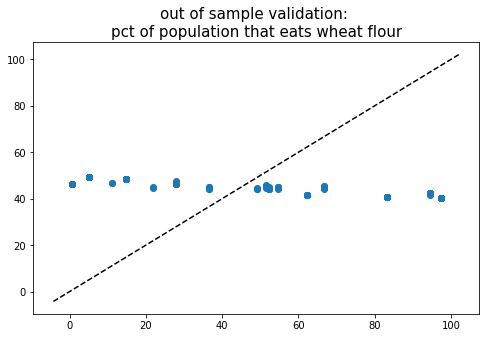

average error (5): 28.94
average clipped err (5): 28.94
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


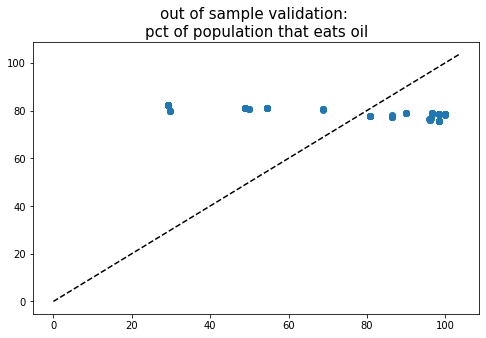

average error (5): 23.84
average clipped err (5): 23.84
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


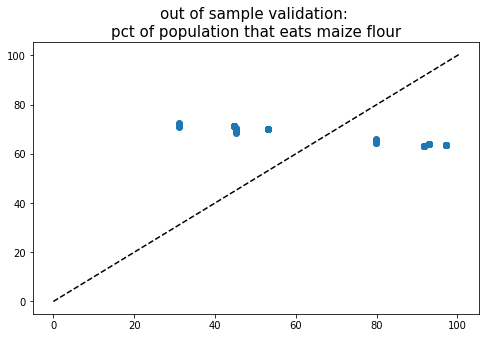

average error (5): 26.48
average clipped err (5): 26.48
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


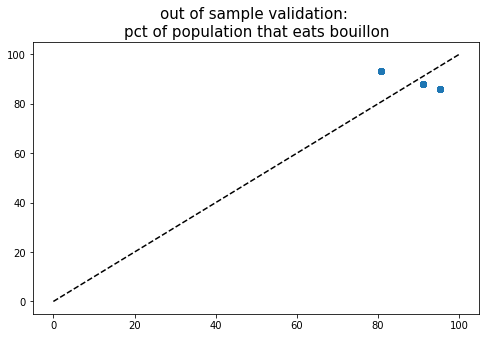

average error (5): 8.87
average clipped err (5): 8.87
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


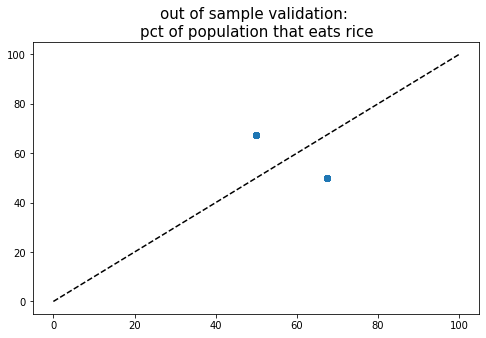

average error (5): 17.35
average clipped err (5): 17.35
avg overall error (5): 21.10
avg overall clipped error for 5: 21.10
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


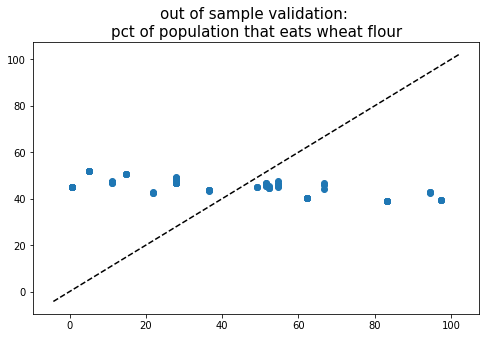

average error (10): 27.50
average clipped err (10): 27.50
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


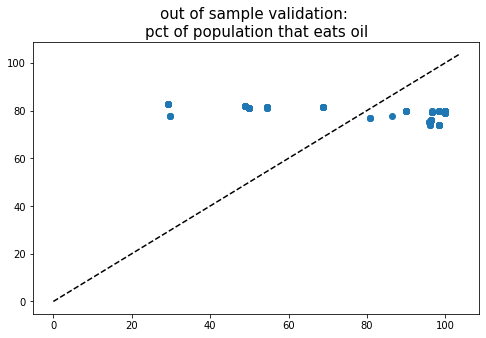

average error (10): 23.43
average clipped err (10): 23.43
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


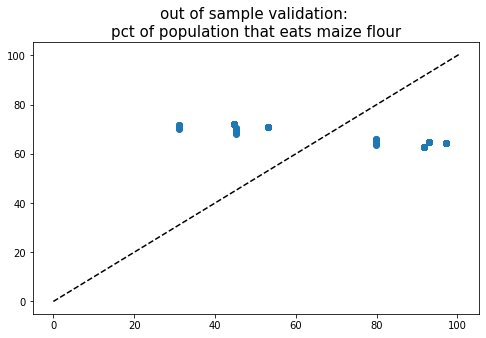

average error (10): 27.47
average clipped err (10): 27.47
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


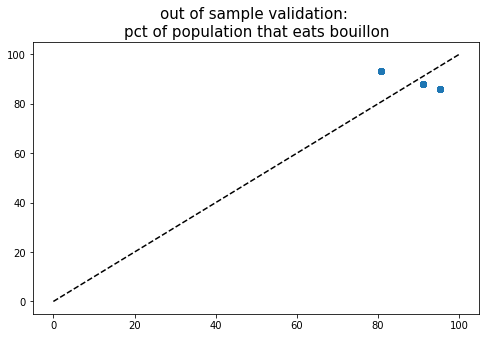

average error (10): 8.32
average clipped err (10): 8.32
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


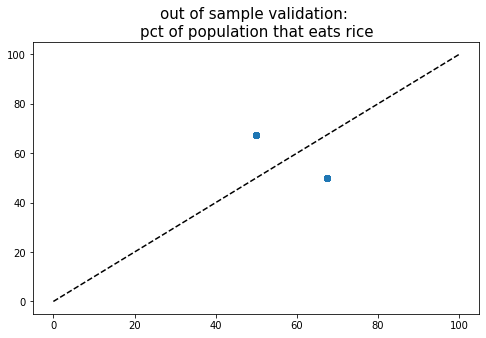

average error (10): 17.35
average clipped err (10): 17.35
avg overall error (10): 20.81
avg overall clipped error for 10: 20.81
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


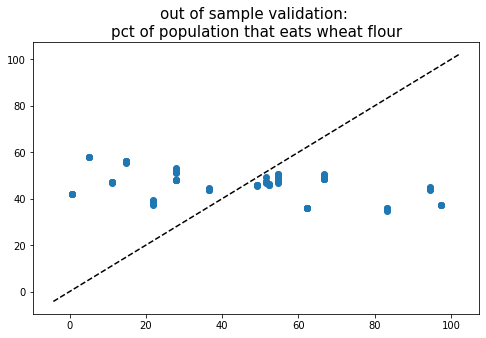

average error (25): 26.73
average clipped err (25): 26.73
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


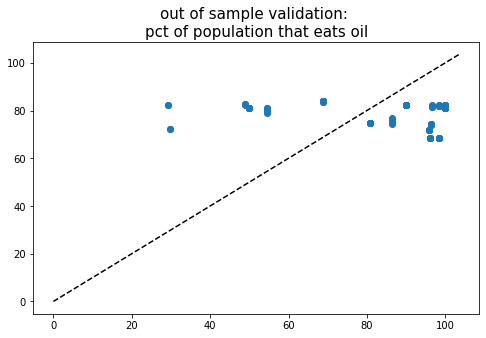

average error (25): 19.96
average clipped err (25): 19.96
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


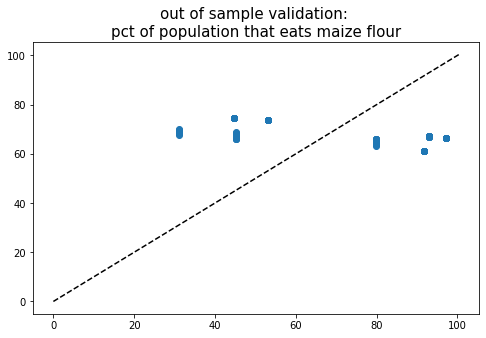

average error (25): 25.07
average clipped err (25): 25.07
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


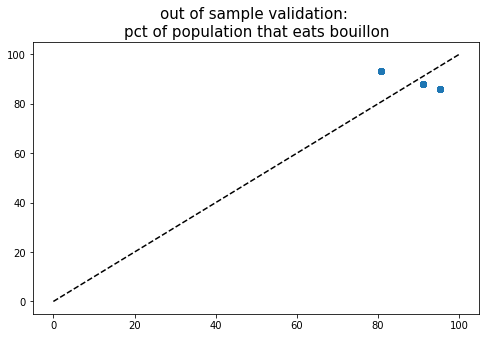

average error (25): 7.99
average clipped err (25): 7.99
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


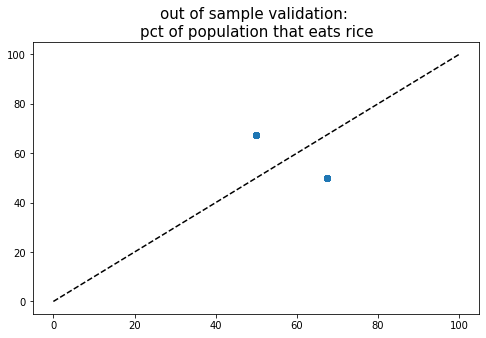

average error (25): 17.35
average clipped err (25): 17.35
avg overall error (25): 19.42
avg overall clipped error for 25: 19.42
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


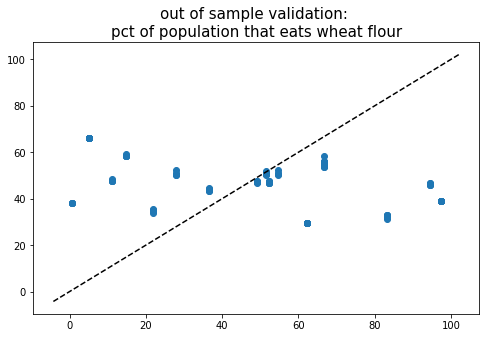

average error (50): 28.70
average clipped err (50): 28.70
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


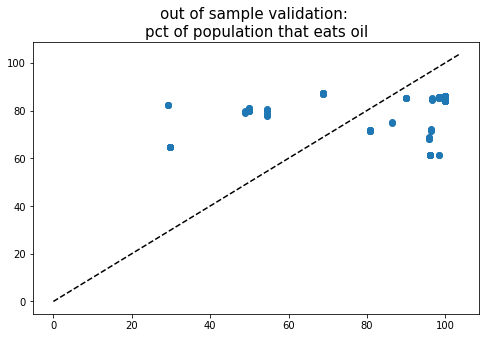

average error (50): 21.20
average clipped err (50): 21.20
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


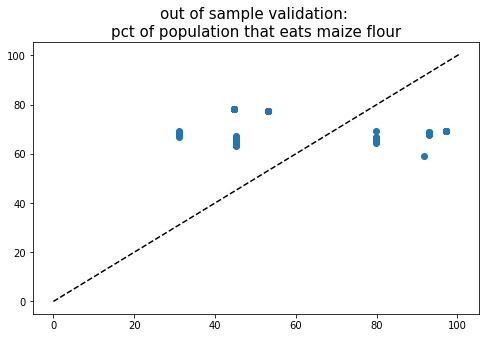

average error (50): 25.01
average clipped err (50): 25.01
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


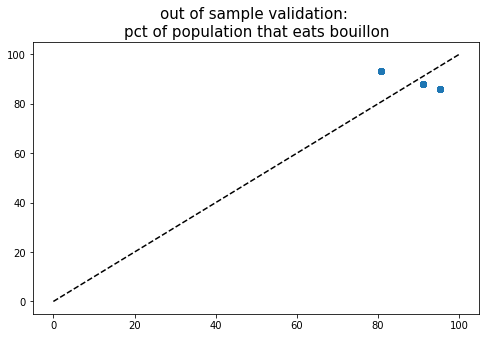

average error (50): 8.29
average clipped err (50): 8.29
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


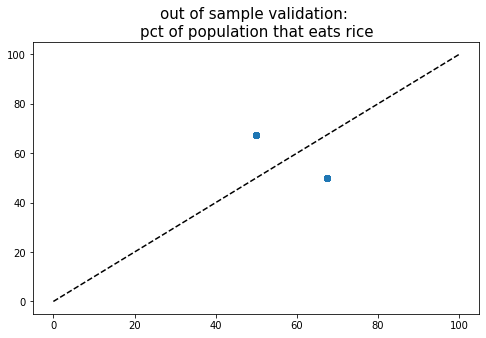

average error (50): 17.35
average clipped err (50): 17.35
avg overall error (50): 20.11
avg overall clipped error for 50: 20.11
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


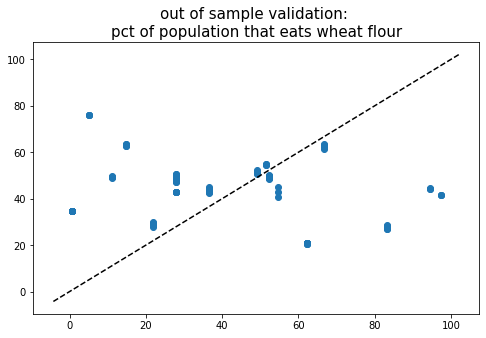

average error (100): 26.24
average clipped err (100): 26.24
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


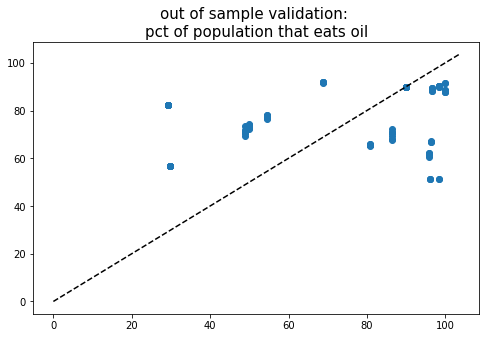

average error (100): 21.25
average clipped err (100): 21.25
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


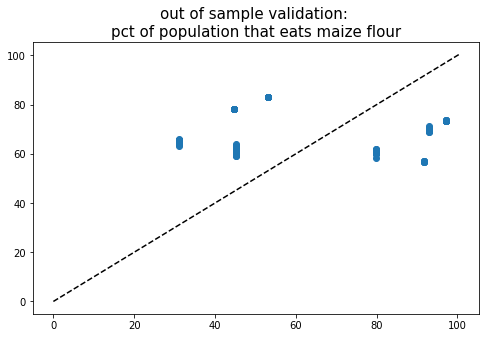

average error (100): 25.74
average clipped err (100): 25.74
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


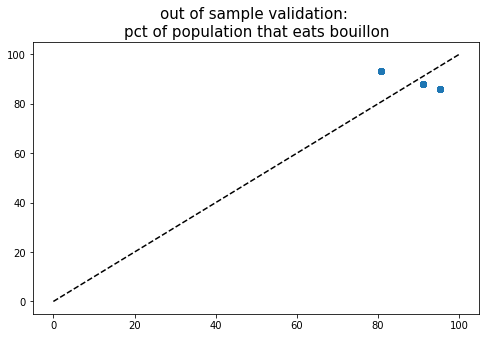

average error (100): 7.79
average clipped err (100): 7.79
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


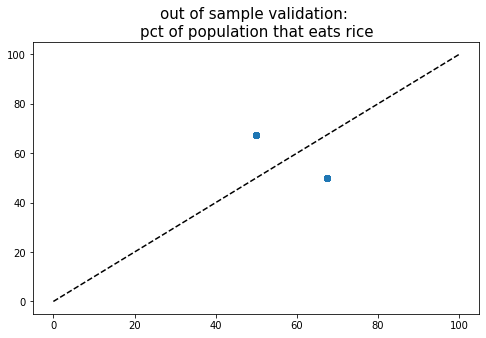

average error (100): 17.35
average clipped err (100): 17.35
avg overall error (100): 19.67
avg overall clipped error for 100: 19.67
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


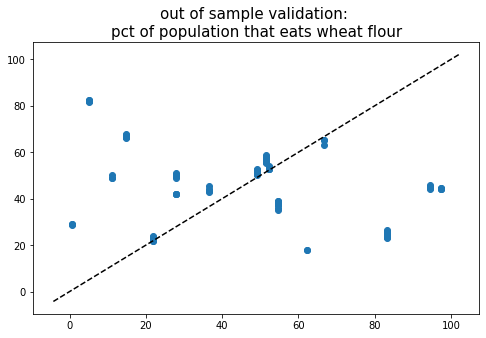

average error (200): 26.17
average clipped err (200): 26.17
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


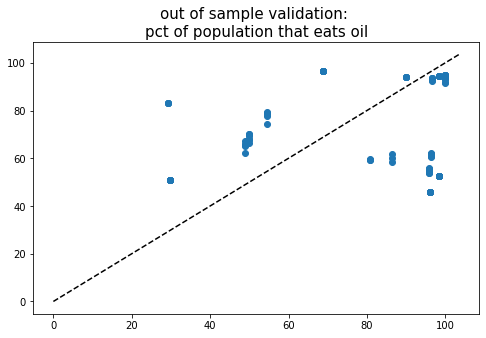

average error (200): 24.62
average clipped err (200): 24.62
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


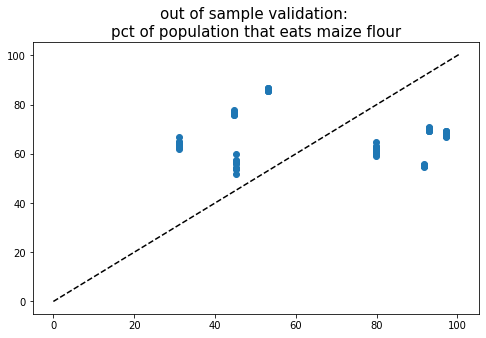

average error (200): 25.99
average clipped err (200): 25.99
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


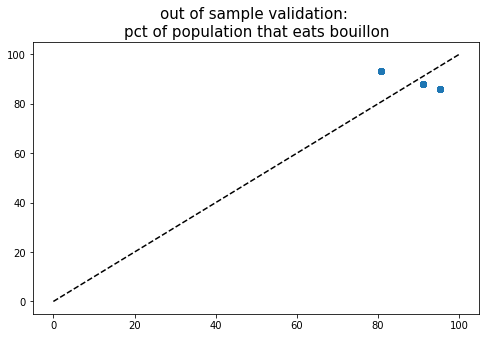

average error (200): 8.21
average clipped err (200): 8.21
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


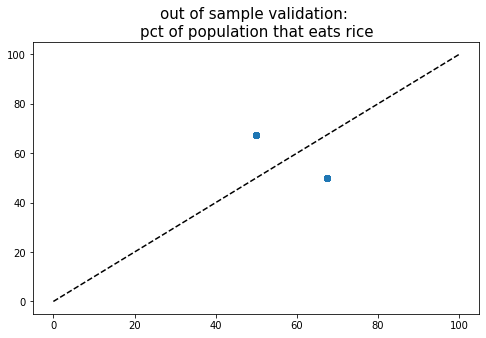

average error (200): 17.35
average clipped err (200): 17.35
avg overall error (200): 20.47
avg overall clipped error for 200: 20.47
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


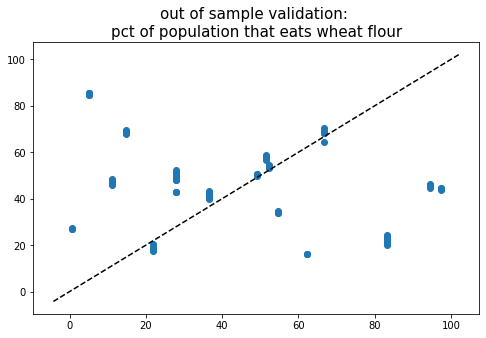

average error (300): 29.94
average clipped err (300): 29.94
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


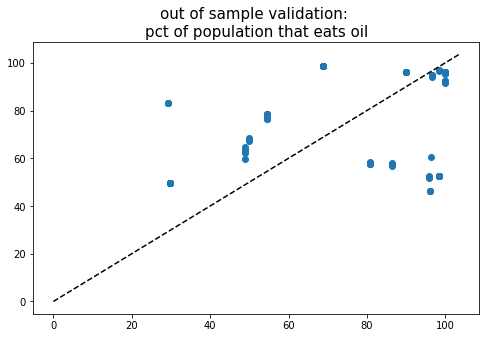

average error (300): 22.05
average clipped err (300): 22.05
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


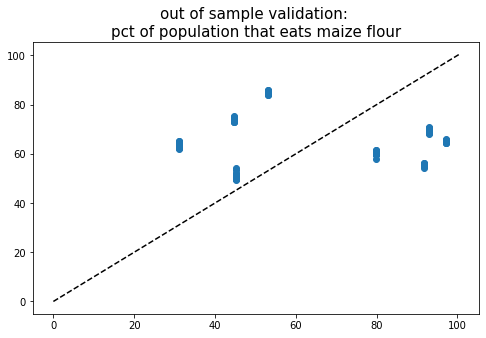

average error (300): 27.07
average clipped err (300): 27.07
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


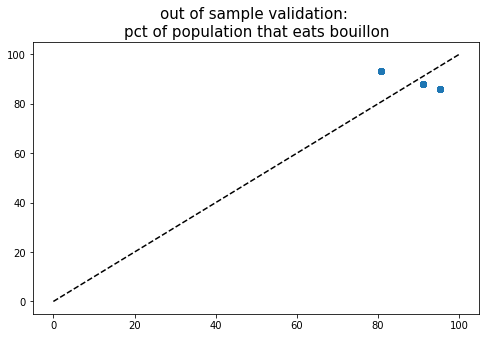

average error (300): 8.64
average clipped err (300): 8.64
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


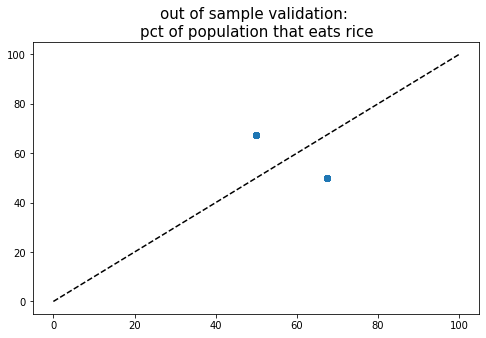

average error (300): 17.35
average clipped err (300): 17.35
avg overall error (300): 21.01
avg overall clipped error for 300: 21.01
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


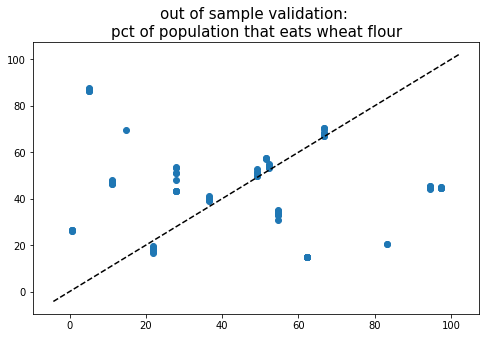

average error (400): 27.10
average clipped err (400): 27.10
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


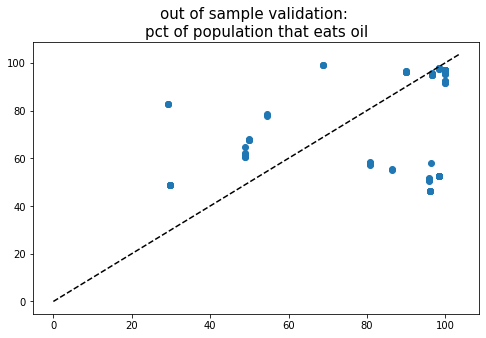

average error (400): 19.68
average clipped err (400): 19.68
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


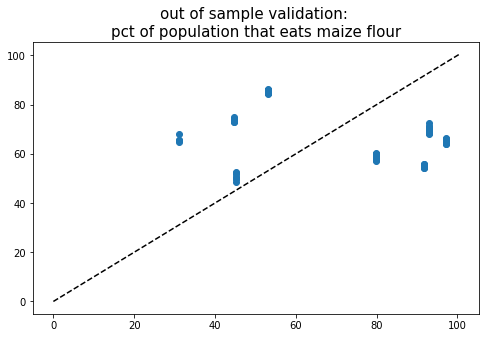

average error (400): 27.58
average clipped err (400): 27.58
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


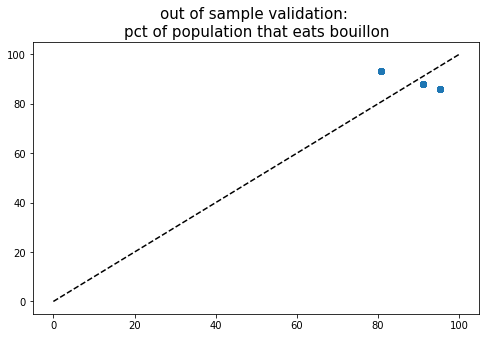

average error (400): 8.35
average clipped err (400): 8.35
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


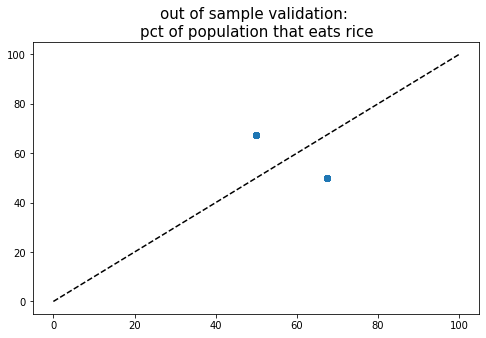

average error (400): 17.35
average clipped err (400): 17.35
avg overall error (400): 20.01
avg overall clipped error for 400: 20.01
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


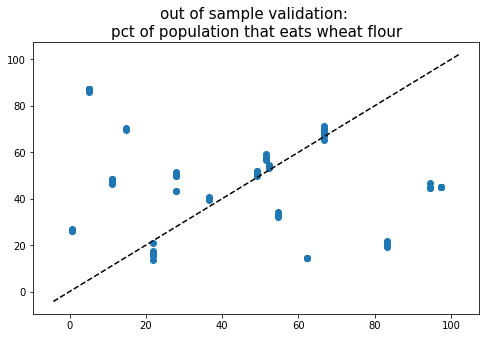

average error (500): 27.73
average clipped err (500): 27.73
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


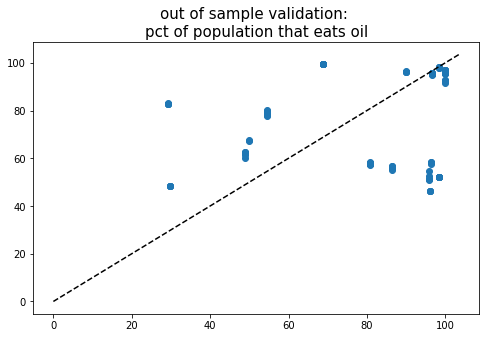

average error (500): 22.41
average clipped err (500): 22.41
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


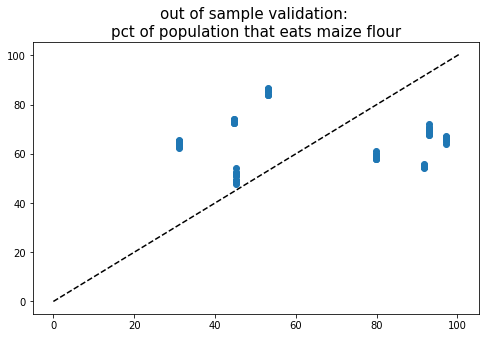

average error (500): 26.60
average clipped err (500): 26.60
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


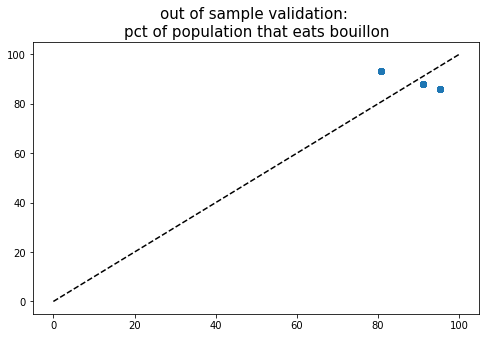

average error (500): 8.84
average clipped err (500): 8.84
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


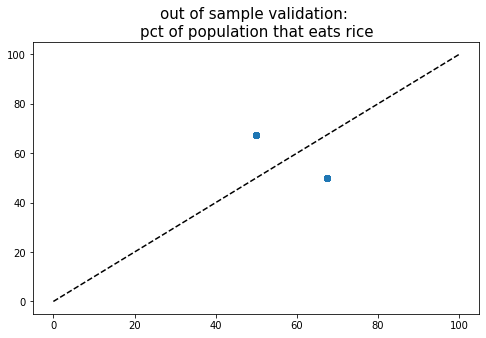

average error (500): 17.35
average clipped err (500): 17.35
avg overall error (500): 20.59
avg overall clipped error for 500: 20.59
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


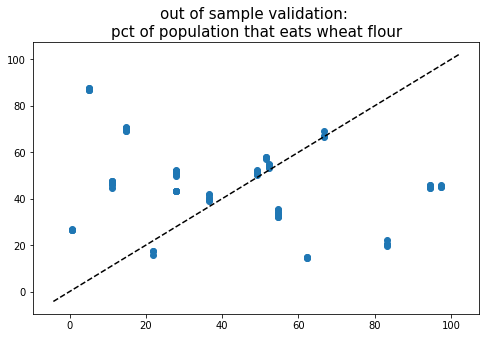

average error (800): 29.62
average clipped err (800): 29.62
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


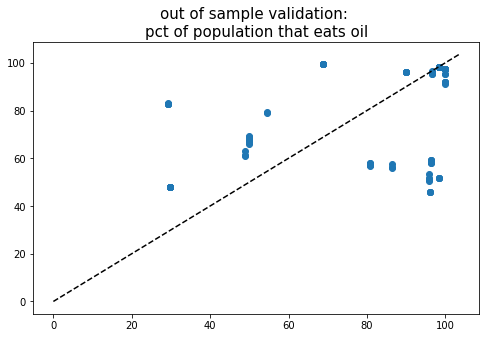

average error (800): 21.72
average clipped err (800): 21.72
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


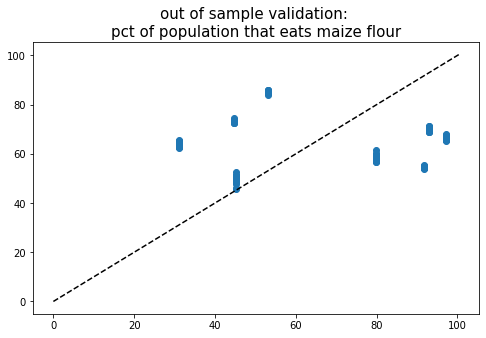

average error (800): 24.23
average clipped err (800): 24.23
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


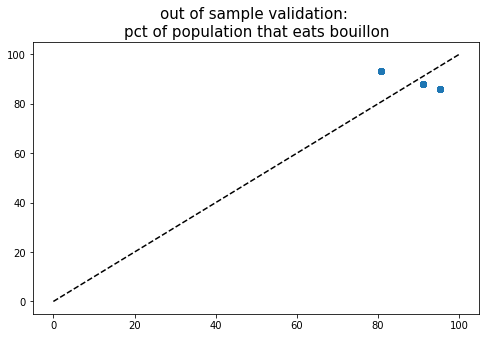

average error (800): 8.21
average clipped err (800): 8.21
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


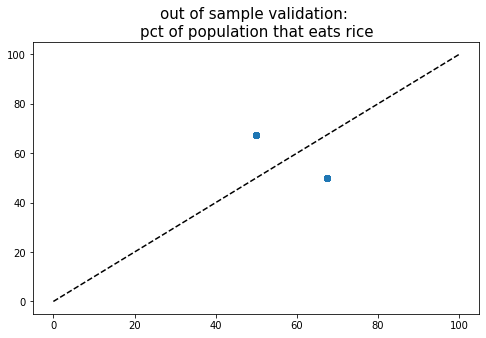

average error (800): 17.35
average clipped err (800): 17.35
avg overall error (800): 20.23
avg overall clipped error for 800: 20.23
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


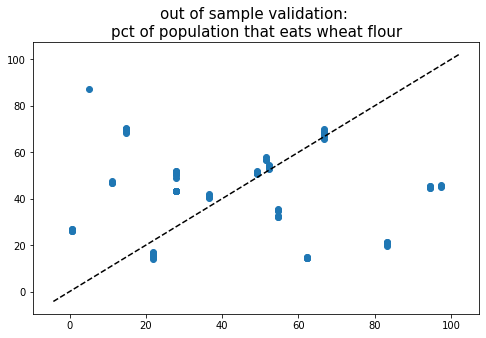

average error (1000): 25.16
average clipped err (1000): 25.16
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


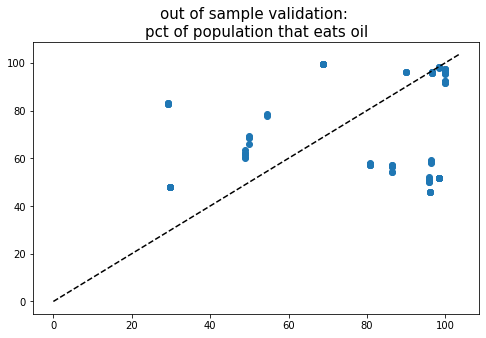

average error (1000): 24.69
average clipped err (1000): 24.69
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


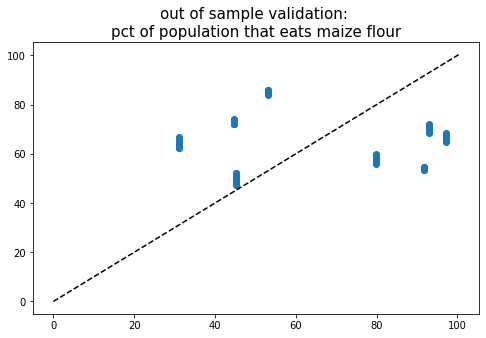

average error (1000): 24.18
average clipped err (1000): 24.18
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


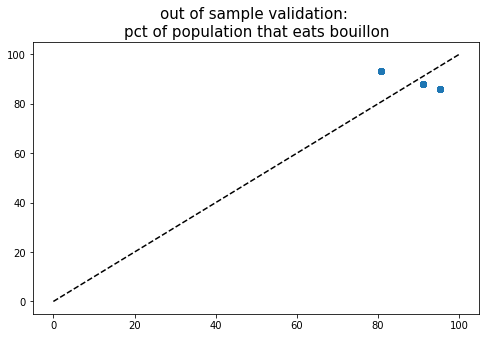

average error (1000): 8.49
average clipped err (1000): 8.49
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


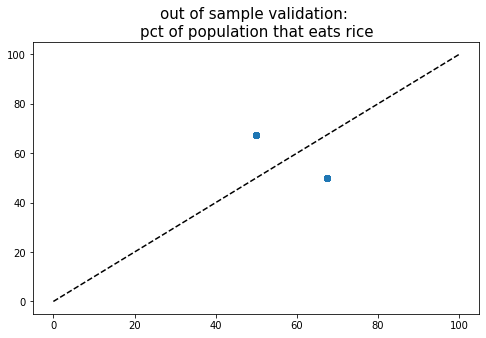

average error (1000): 17.35
average clipped err (1000): 17.35
avg overall error (1000): 19.97
avg overall clipped error for 1000: 19.97


In [18]:
for k in [5,10,25,50,100,200,300,400,500,800,1000]:
    params = {'n_estimators': k,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
    
    save_path = 'pct_eating_vehicle.pdf'


    use_logit = False
    total_err = 0
    total_clipped_err = 0
    for vehicle in ['wheat flour', 'oil', 'maize flour', 'bouillon', 'rice']:
        X, y, X_full, y_full, locs = setupReg(df, vehicle, use_logit)

        holdout, preds = runReg(X,y)
        for i in range(100):
            a, b = runReg(X,y)
            holdout = np.concatenate((holdout, a))
            preds = np.concatenate((preds, b))

        fig = plt.figure(figsize=(8,5))
        plotReg(preds, holdout, use_logit, vehicle)
        plt.show()

        err = sum(np.abs(y[holdout] - preds)) / len(holdout)
        total_err += err
        print(f'average error ({k}): {err:0.2f}')

        clipped_err = sum(np.abs(y[holdout] - np.clip(preds, 0, 100))) / len(holdout)
        total_clipped_err += clipped_err
        print(f'average clipped err ({k}): {clipped_err:0.2f}')

    print(f'avg overall error ({k}): {total_err/5:0.2f}')
    print(f'avg overall clipped error for {k}: {total_clipped_err/5:0.2f}')

Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


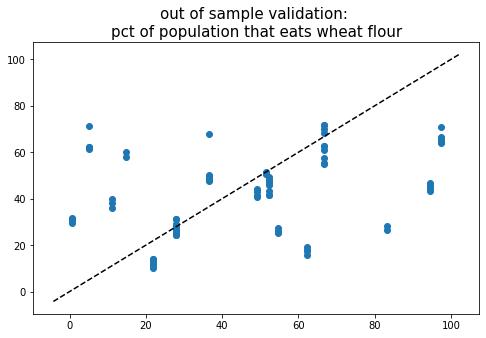

average error (lad): 19.84
average clipped err (lad): 19.84
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


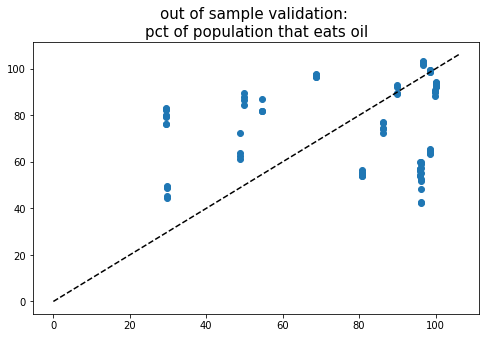

average error (lad): 23.66
average clipped err (lad): 23.46
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


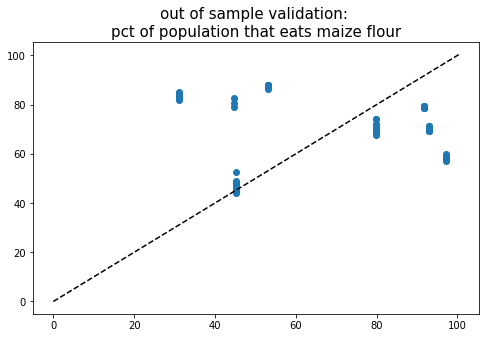

average error (lad): 24.40
average clipped err (lad): 24.40
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


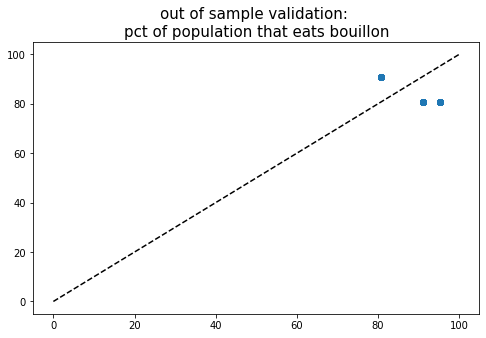

average error (lad): 11.52
average clipped err (lad): 11.52
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


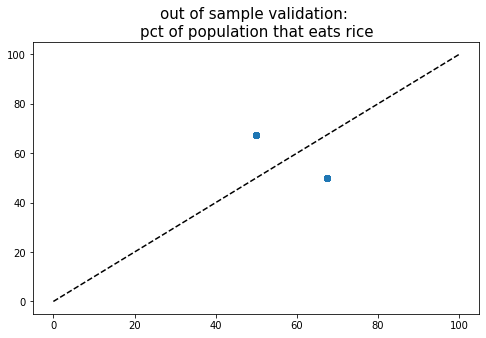

average error (lad): 17.35
average clipped err (lad): 17.35
avg overall error (lad): 19.35
avg overall clipped error for lad: 19.31
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


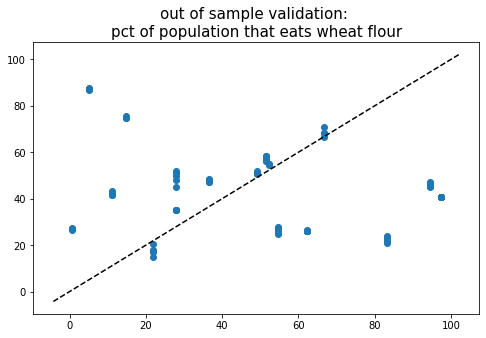

average error (huber): 31.75
average clipped err (huber): 31.75
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


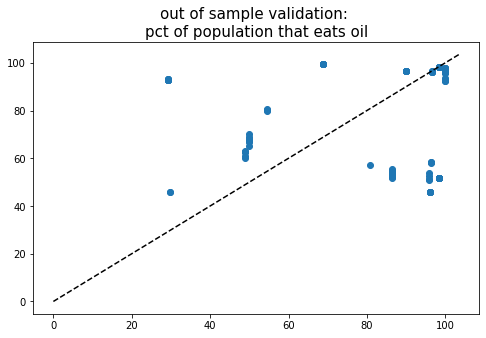

average error (huber): 25.39
average clipped err (huber): 25.39
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


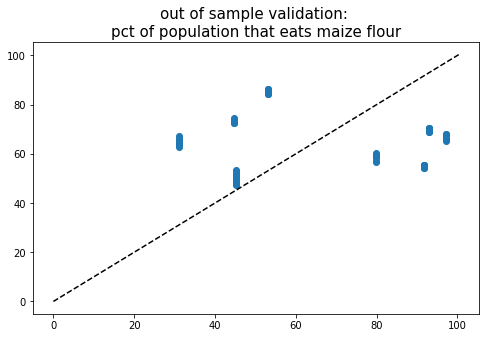

average error (huber): 25.83
average clipped err (huber): 25.83
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


KeyboardInterrupt: 

In [20]:
for fn in ['lad','huber','quintile']:
    params = {'n_estimators': 1_000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': fn}
    
    save_path = 'pct_eating_vehicle.pdf'


    use_logit = False
    total_err = 0
    total_clipped_err = 0
    for vehicle in ['wheat flour', 'oil', 'maize flour', 'bouillon', 'rice']:
        X, y, X_full, y_full, locs = setupReg(df, vehicle, use_logit)

        holdout, preds = runReg(X,y)
        for i in range(100):
            a, b = runReg(X,y)
            holdout = np.concatenate((holdout, a))
            preds = np.concatenate((preds, b))

        fig = plt.figure(figsize=(8,5))
        plotReg(preds, holdout, use_logit, vehicle)
        plt.show()

        err = sum(np.abs(y[holdout] - preds)) / len(holdout)
        total_err += err
        print(f'average error ({fn}): {err:0.2f}')

        clipped_err = sum(np.abs(y[holdout] - np.clip(preds, 0, 100))) / len(holdout)
        total_clipped_err += clipped_err
        print(f'average clipped err ({fn}): {clipped_err:0.2f}')

    print(f'avg overall error ({fn}): {total_err/5:0.2f}')
    print(f'avg overall clipped error for {fn}: {total_clipped_err/5:0.2f}')

Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


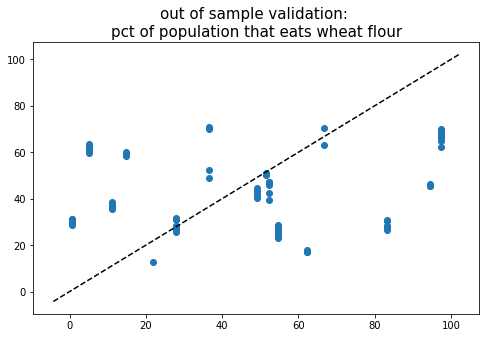

average error (depth = 4): 25.15
average clipped err (depth = 4): 25.15
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


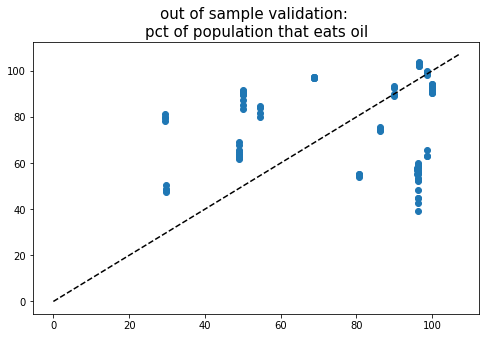

average error (depth = 4): 24.48
average clipped err (depth = 4): 24.34
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


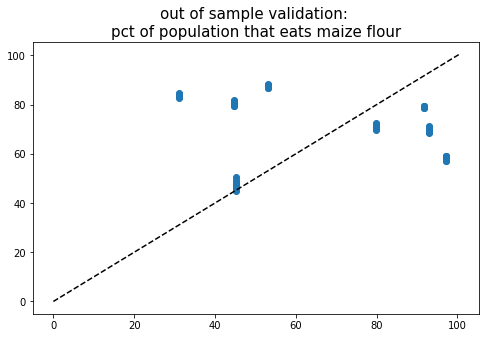

average error (depth = 4): 25.71
average clipped err (depth = 4): 25.71
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


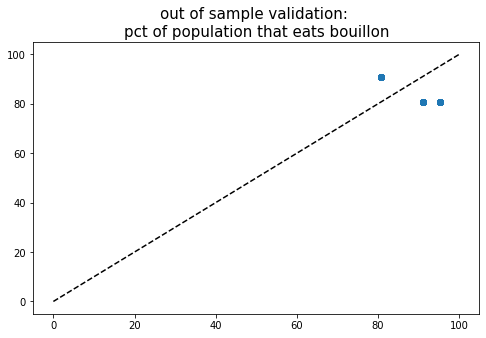

average error (depth = 4): 11.89
average clipped err (depth = 4): 11.89
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


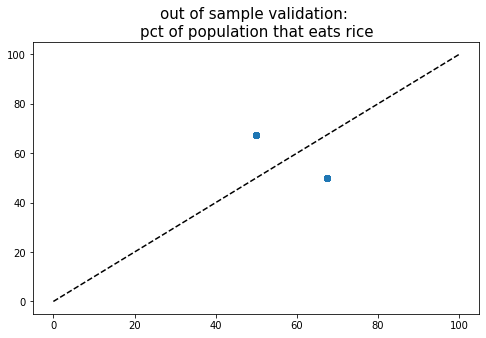

average error (depth = 4): 17.35
average clipped err (depth = 4): 17.35
avg overall error (depth = 4): 20.92
avg overall clipped error for (depth = 4): 20.89
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


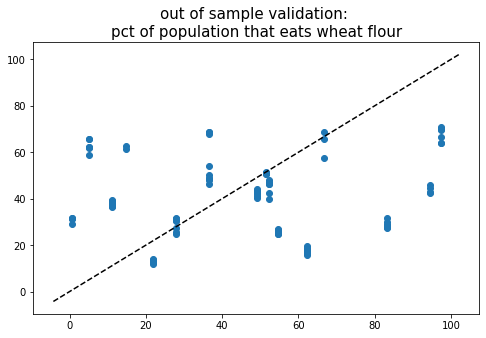

average error (depth = 6): 24.78
average clipped err (depth = 6): 24.78
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


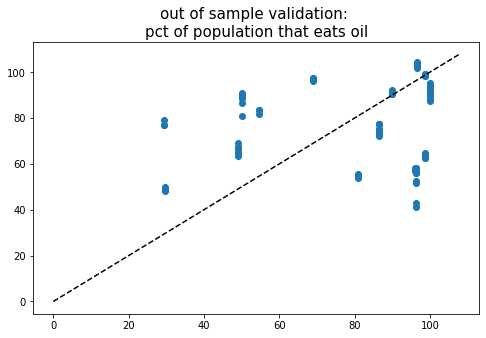

average error (depth = 6): 21.25
average clipped err (depth = 6): 21.08
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


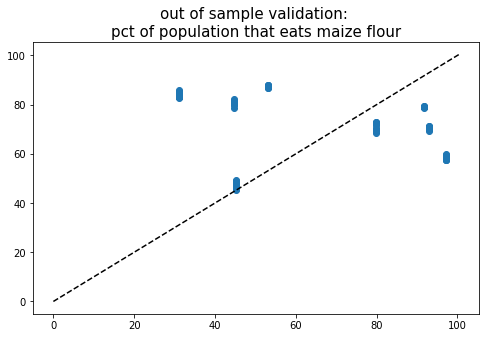

average error (depth = 6): 28.61
average clipped err (depth = 6): 28.61
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


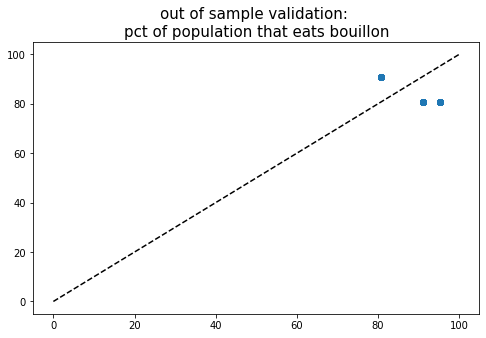

average error (depth = 6): 11.60
average clipped err (depth = 6): 11.60
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


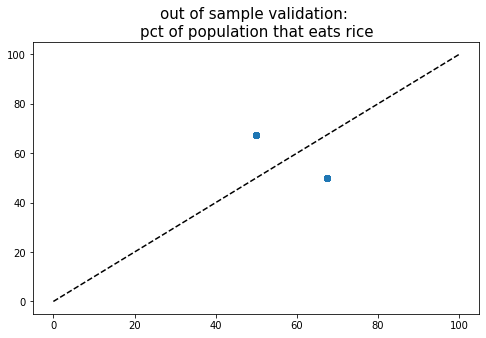

average error (depth = 6): 17.35
average clipped err (depth = 6): 17.35
avg overall error (depth = 6): 20.72
avg overall clipped error for (depth = 6): 20.68
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


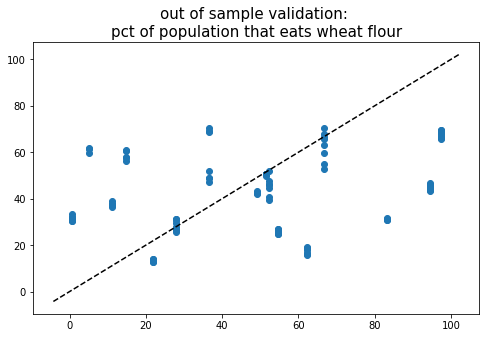

average error (depth = 8): 23.76
average clipped err (depth = 8): 23.76
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


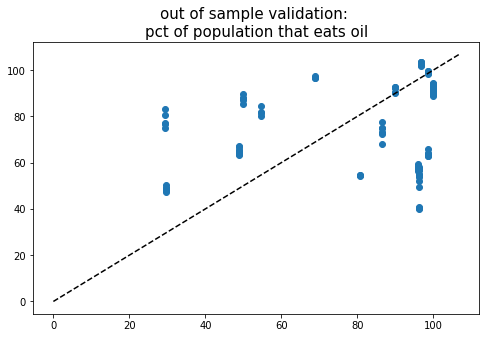

average error (depth = 8): 21.34
average clipped err (depth = 8): 21.14
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


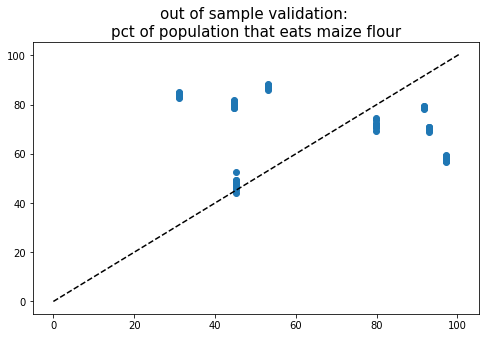

average error (depth = 8): 26.47
average clipped err (depth = 8): 26.47
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


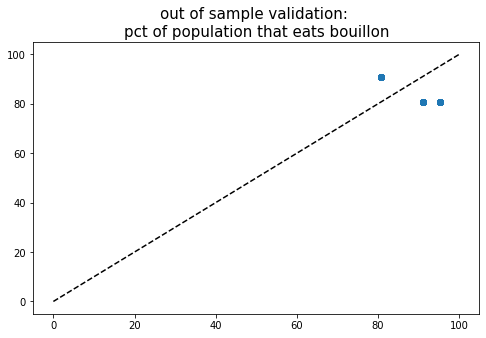

average error (depth = 8): 11.22
average clipped err (depth = 8): 11.22
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


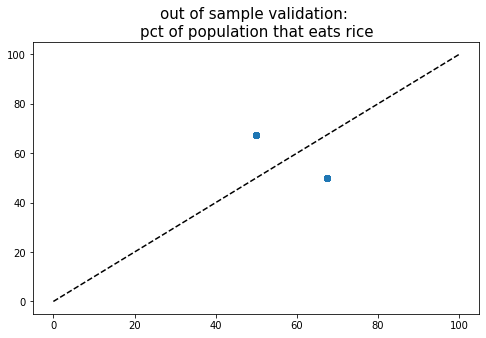

average error (depth = 8): 17.35
average clipped err (depth = 8): 17.35
avg overall error (depth = 8): 20.03
avg overall clipped error for (depth = 8): 19.99
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


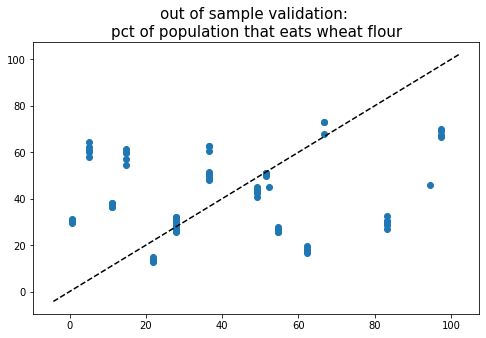

average error (depth = 10): 22.98
average clipped err (depth = 10): 22.98
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


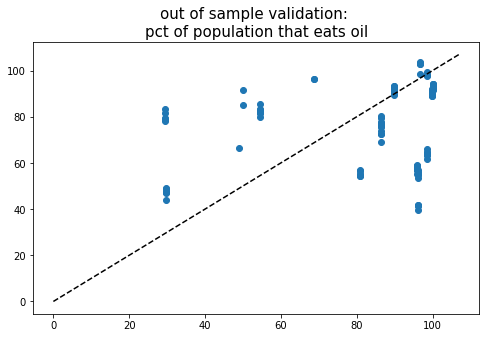

average error (depth = 10): 21.67
average clipped err (depth = 10): 21.54
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


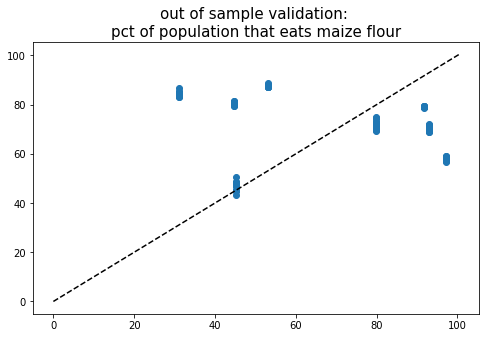

average error (depth = 10): 24.07
average clipped err (depth = 10): 24.07
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


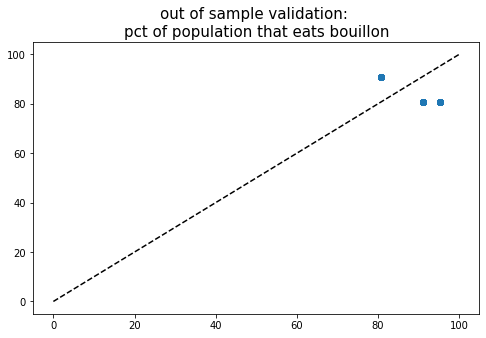

average error (depth = 10): 11.64
average clipped err (depth = 10): 11.64
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


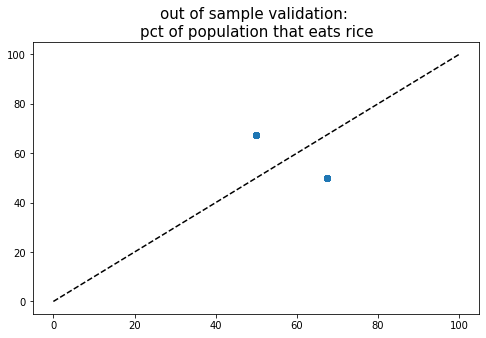

average error (depth = 10): 17.35
average clipped err (depth = 10): 17.35
avg overall error (depth = 10): 19.54
avg overall clipped error for (depth = 10): 19.52


In [21]:
for k in [4,6,8,10]:
    params = {'n_estimators': 1_000,
          'max_depth': k,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'lad'}

    save_path = 'pct_eating_vehicle.pdf'


    use_logit = False
    total_err = 0
    total_clipped_err = 0
    for vehicle in ['wheat flour', 'oil', 'maize flour', 'bouillon', 'rice']:
        X, y, X_full, y_full, locs = setupReg(df, vehicle, use_logit)

        holdout, preds = runReg(X,y)
        for i in range(100):
            a, b = runReg(X,y)
            holdout = np.concatenate((holdout, a))
            preds = np.concatenate((preds, b))

        fig = plt.figure(figsize=(8,5))
        plotReg(preds, holdout, use_logit, vehicle)
        plt.show()

        err = sum(np.abs(y[holdout] - preds)) / len(holdout)
        total_err += err
        print(f'average error (depth = {k}): {err:0.2f}')

        clipped_err = sum(np.abs(y[holdout] - np.clip(preds, 0, 100))) / len(holdout)
        total_clipped_err += clipped_err
        print(f'average clipped err (depth = {k}): {clipped_err:0.2f}')

    print(f'avg overall error (depth = {k}): {total_err/5:0.2f}')
    print(f'avg overall clipped error for (depth = {k}): {total_clipped_err/5:0.2f}')

In [13]:
def runReg(X, y):
    # randomly hold out a selection
    N = y.shape[0]
    select = np.random.choice(N, size = N - 1, replace = False)

#     reg = LinearRegression().fit(X[select], y[select])
#     reg = ElasticNet(max_iter=5_000, tol = 1.5e-3).fit(X[select], y[select])
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(X[select], y[select])
    
    holdout = np.array([i for i in range(N) if i not in select])
    preds = reg.predict(X[holdout])
    
    return holdout, preds

In [14]:
def plotReg(preds, holdout, use_logit, vehicle):
    if use_logit:
        backtransf_preds = (expit(preds) + shift) * 100
        backtransf_y = (expit(y[holdout]) + shift) * 100
        plt.scatter(backtransf_y, backtransf_preds)

        l,r,b,t = plt.axis()
        lb = min(0,l,b)
        ub = max(100,r,t)
        plt.plot([lb,ub], [lb,ub], 'k--')

        plt.title(f"out of sample validation: \npct of population that eats {vehicle}, using shifted logit tranform", fontsize = 15)    
    else:
        plt.scatter(y[holdout], preds)
        
        l,r,b,t = plt.axis()
        lb = min(0,l,b)
        ub = max(100,r,t)
        plt.plot([lb,ub], [lb,ub], 'k--')
        
        plt.title(f"out of sample validation: \npct of population that eats {vehicle}", fontsize = 15)

In [15]:
import matplotlib.backends.backend_pdf

Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


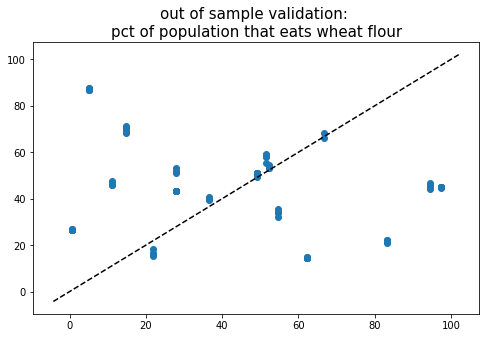

average error: 30.91
average clipped err: 30.91
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


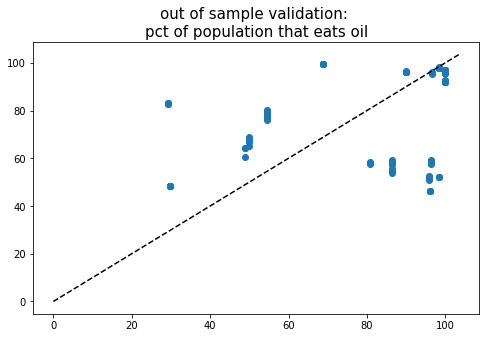

average error: 20.94
average clipped err: 20.94
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


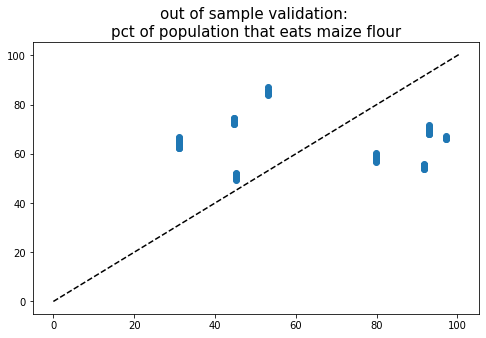

average error: 27.62
average clipped err: 27.62
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


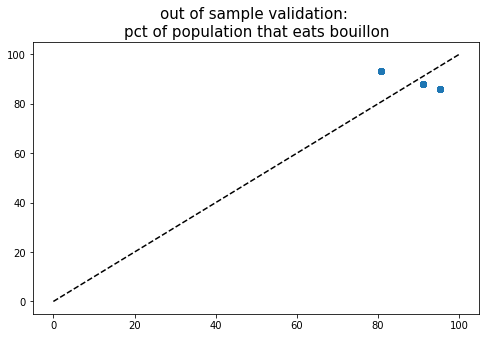

average error: 7.88
average clipped err: 7.88
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


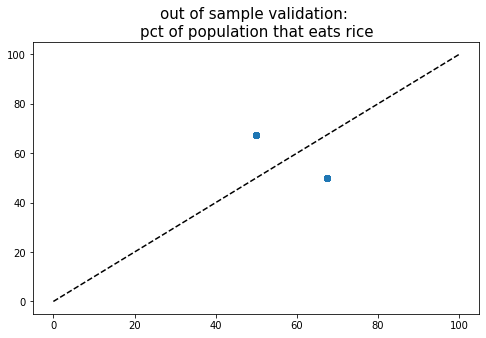

average error: 17.35
average clipped err: 17.35
avg overall error: 20.94
avg overall clipped error: 20.94


In [16]:
save_path = 'pct_eating_vehicle.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(save_path)


use_logit = False
total_err = 0
total_clipped_err = 0
for vehicle in ['wheat flour', 'oil', 'maize flour', 'bouillon', 'rice']:
    X, y, X_full, y_full, locs = setupReg(df, vehicle, use_logit)

    holdout, preds = runReg(X,y)
    for i in range(100):
        a, b = runReg(X,y)
        holdout = np.concatenate((holdout, a))
        preds = np.concatenate((preds, b))
    
    fig = plt.figure(figsize=(8,5))
    plotReg(preds, holdout, use_logit, vehicle)
    plt.show()
    pdf.savefig(fig)
    
    err = sum(np.abs(y[holdout] - preds)) / len(holdout)
    total_err += err
    print(f'average error: {err:0.2f}')
    
    clipped_err = sum(np.abs(y[holdout] - np.clip(preds, 0, 100))) / len(holdout)
    total_clipped_err += clipped_err
    print(f'average clipped err: {clipped_err:0.2f}')

pdf.close()
print(f'avg overall error: {total_err/5:0.2f}')
print(f'avg overall clipped error: {total_clipped_err/5:0.2f}')

Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


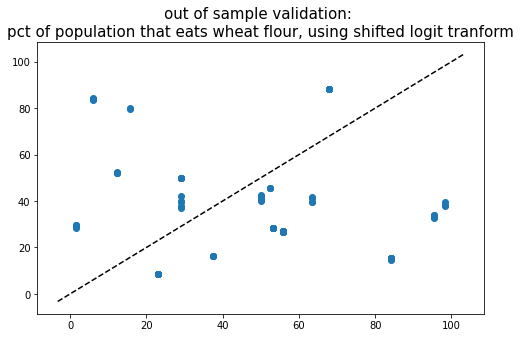

average error: 37.24
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


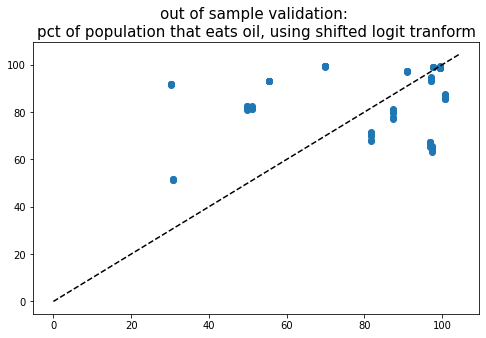

average error: 19.57
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


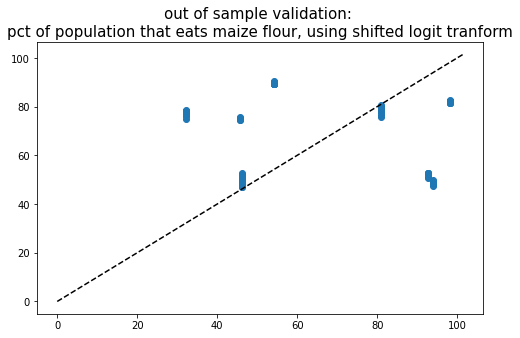

average error: 26.28
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


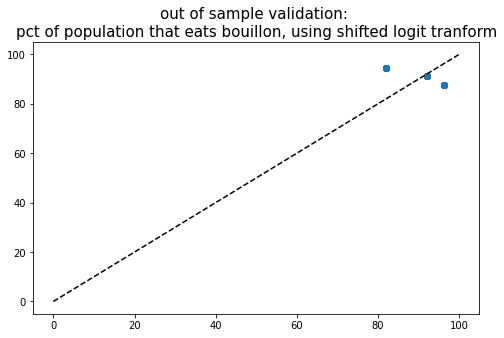

average error: 6.58
Index(['percent_of_population_eating_vehicle',
       'percent_of_population_eating_industrially_produced_vehicle',
       'percent_of_population_eating_fortified_vehicle', 'sodium',
       'whole_grains', 'sdi', 'hh_salt', 'fao_maize_and_products',
       'fao_rice_and_products', 'fao_wheat_and_products', 'fao_oil_all',
       'parent_id'],
      dtype='object')


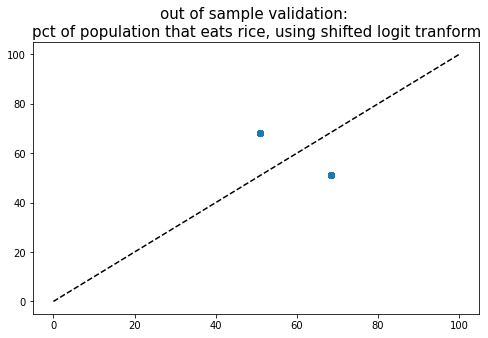

average error: 17.35
avg overall error: 21.41


In [17]:
save_path = 'pct_eating_vehicle_logit.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(save_path)


use_logit = True
total_err = 0
for vehicle in ['wheat flour', 'oil', 'maize flour', 'bouillon', 'rice']:
    X, y, X_full, y_full, locs = setupReg(df, vehicle, use_logit)

    holdout, preds = runReg(X,y)
    for i in range(100):
        a, b = runReg(X,y)
        holdout = np.concatenate((holdout, a))
        preds = np.concatenate((preds, b))

    fig = plt.figure(figsize=(8,5))
    plotReg(preds, holdout, use_logit, vehicle)
    plt.show()
    pdf.savefig(fig)
    
    err = sum(np.abs(((expit(y[holdout]) + shift) * 100) - ((expit(preds) + shift) * 100))) / len(holdout)
    total_err += err
    print(f'average error: {err:0.2f}')
pdf.close()
print(f'avg overall error: {total_err/5:0.2f}')

In [25]:
df[['location_name','vehicle','percent_of_population_eating_vehicle']].drop_duplicates().groupby('vehicle').count()

,location_name,percent_of_population_eating_vehicle
vehicle,,
bouillon,7,3
maize flour,17,8
oil,25,18
rice,3,2
salt,3,1
wheat flour,25,17


In [13]:
## generate estimates

In [14]:
def estimate_nans(df, vehicle, use_logit, clip = True):
    
    # format for regression
    X, y, X_full, y_full, locs = setupReg(df, vehicle, use_logit)
    
    # run regression
    reg = LinearRegression().fit(X, y)
    
    # predict out
    preds = reg.predict(X_full)
    
    # populate missings with estimates
    y_full[np.isnan(y_full)] = preds[np.isnan(y_full)] 
    
    if use_logit:
        y_full = (expit(y_full) + shift) * 100
    
    if clip:
        y_full = np.clip(y_full, 0, 100)
    
    return pd.DataFrame({'location_name':locs,'vehicle':vehicle,'percent_of_population_eating_vehicle':y_full})

In [18]:
use_logit = False
vehicle = "wheat flour"
X, y, X_full, y_full, locs = setupReg(df, vehicle, use_logit)

In [34]:
reg = LinearRegression().fit(X, y)
preds = reg.predict(X_full)

In [43]:
reg.coef_

array([ 2.98663434e-01,  1.26201535e+00,  5.91713522e+00,  2.10634555e-01,
       -8.58135855e+01,  1.54806794e+01, -5.44527242e-02,  2.98031195e-03,
        9.39870688e-02,  6.74298455e-02])

In [44]:
reg.intercept_

6.419514880039912

In [45]:
reg.coef_.shape

(10,)

In [46]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [47]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y, reg.predict(X))

224.82240876583887

In [51]:
y

array([62.35      , 52.3       , 94.46363636, 54.7       ,  0.58      ,
       28.        , 83.2       , 36.58      , 66.76666667,  5.        ,
       27.96666667, 49.05      , 97.33333333, 14.75      , 51.5       ,
       11.2       , 21.93      ])

In [53]:
rp = reg.predict(X)

In [58]:
np.mean([i**2 for i in (y - rp)])

224.82240876583887

In [38]:
compare = pd.DataFrame({'location_name':locs,'vehicle':vehicle,'estimates':preds,'data':y_full})

In [41]:
compare['error'] = np.abs(compare.data - compare.estimates)

In [42]:
compare

,location_name,vehicle,estimates,data,error
0,Angola,wheat flour,38.200736,NaN,NaN
1,Bangladesh,wheat flour,42.786478,62.350000,19.563522
2,Burkina Faso,wheat flour,28.989654,52.300000,23.310346
3,Cameroon,wheat flour,88.597117,94.463636,5.866519
...,...,...,...,...,...
21,Sudan,wheat flour,68.367950,NaN,NaN
22,United Republic of Tanzania,wheat flour,48.608870,51.500000,2.891130
23,Uganda,wheat flour,15.647225,11.200000,4.447225
24,Viet Nam,wheat flour,23.687909,21.930000,1.757909


In [20]:
estimates = pd.concat([estimate_nans(df, vehicle, use_logit = False, clip = True)
                       for vehicle in ['wheat flour', 'oil', 'maize flour', 'bouillon', 'rice']])

In [21]:
estimates

,location_name,vehicle,percent_of_population_eating_vehicle
0,Angola,wheat flour,38.200736
1,Bangladesh,wheat flour,62.350000
2,Burkina Faso,wheat flour,52.300000
3,Cameroon,wheat flour,94.463636
...,...,...,...
6,Nigeria,bouillon,98.727280
0,Ghana,rice,65.746433
1,India,rice,50.000000
2,Nigeria,rice,67.350000


In [24]:
estimates = estimates.rename(columns={'percent_of_population_eating_vehicle':'estimated'})

In [30]:
compare = df[['location_name','vehicle','percent_of_population_eating_vehicle']].drop_duplicates()

compare = compare.merge(estimates, on = ['location_name','vehicle'], how = 'outer')

In [32]:
compare['error'] = np.abs(compare.percent_of_population_eating_vehicle - compare.estimated)

In [33]:
compare

,location_name,vehicle,percent_of_population_eating_vehicle,estimated,error
0,Angola,wheat flour,NaN,38.200736,NaN
1,Angola,oil,NaN,91.912645,NaN
2,Angola,maize flour,NaN,27.751148,NaN
3,Bangladesh,wheat flour,62.35,62.350000,0.0
...,...,...,...,...,...
76,Uganda,oil,89.90,89.900000,0.0
77,Uganda,maize flour,91.80,91.800000,0.0
78,Viet Nam,wheat flour,21.93,21.930000,0.0
79,Viet Nam,oil,54.50,54.500000,0.0


In [59]:
compare

,location_name,vehicle,estimates,data,error
0,Angola,wheat flour,38.200736,NaN,NaN
1,Bangladesh,wheat flour,42.786478,62.350000,19.563522
2,Burkina Faso,wheat flour,28.989654,52.300000,23.310346
3,Cameroon,wheat flour,88.597117,94.463636,5.866519
...,...,...,...,...,...
21,Sudan,wheat flour,68.367950,NaN,NaN
22,United Republic of Tanzania,wheat flour,48.608870,51.500000,2.891130
23,Uganda,wheat flour,15.647225,11.200000,4.447225
24,Viet Nam,wheat flour,23.687909,21.930000,1.757909


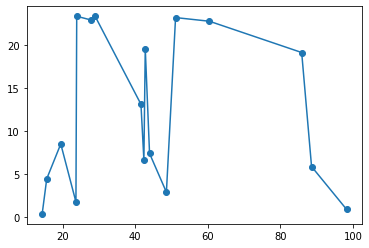

In [67]:
compare = compare.sort_values('estimates')
compare = compare.dropna()

plt.plot(compare.estimates, compare.error)
plt.scatter(compare.estimates, compare.error)
plt.show()

In [16]:
fname = 'percent_of_population_eating_vehicle_estimates.csv'
estimates.to_csv(fname, index = False)

In [17]:
estimates

,location_name,vehicle,percent_of_population_eating_vehicle
0,Angola,wheat flour,38.200736
1,Bangladesh,wheat flour,62.350000
2,Burkina Faso,wheat flour,52.300000
3,Cameroon,wheat flour,94.463636
...,...,...,...
6,Nigeria,bouillon,98.727280
0,Ghana,rice,65.746433
1,India,rice,50.000000
2,Nigeria,rice,67.350000


In [18]:
df[(df.percent_of_population_eating_vehicle.isna()) & (df.percent_of_population_eating_industrially_produced_vehicle.notna())]

,location_name,vehicle,nutrient,percent_of_population_eating_vehicle,percent_of_population_eating_industrially_produced_vehicle,percent_of_population_eating_fortified_vehicle,location_id,sodium,whole_grains,sdi,hh_salt,fao_maize_and_products,fao_rice_and_products,fao_wheat_and_products,fao_oil_all
250,Nigeria,salt,iron,NaN,93.0,0.0,214,0.908433,8.865245,0.460839,0.935323,315.0,266.0,195.0,284.0
251,Nigeria,bouillon,iron,NaN,61.5,0.0,214,0.908433,8.865245,0.460839,0.935323,315.0,266.0,195.0,284.0
252,Nigeria,bouillon,zinc,NaN,61.5,0.0,214,0.908433,8.865245,0.460839,0.935323,315.0,266.0,195.0,284.0
253,Nigeria,bouillon,folic acid,NaN,61.5,0.0,214,0.908433,8.865245,0.460839,0.935323,315.0,266.0,195.0,284.0
254,Nigeria,bouillon,vitamin a,NaN,61.5,0.0,214,0.908433,8.865245,0.460839,0.935323,315.0,266.0,195.0,284.0
347,Nigeria,salt,folic acid,NaN,93.0,0.0,214,0.908433,8.865245,0.460839,0.935323,315.0,266.0,195.0,284.0


In [19]:
estimates[(estimates.location_name=="Nigeria") & (estimates.vehicle.isin(['salt','bouillon']))]

,location_name,vehicle,percent_of_population_eating_vehicle
6,Nigeria,bouillon,98.72728
